# Benchmarking: comparing methods 1 on 1 in specific datasets

Sometimes it is interesting to compare the performance of estimators in specific datasets. 

We use two aeon classifiers for our examples: FreshPRINCERegressor [1], a pipeline of TSFresh transform followed by a rotation forest regressor, and DrCIFRegressor [1], an extension of the CIF algorithm using multiple representations.

The Covid3Month dataset is used. 

We start by running both classifiers and getting their predictions.

In [1]:
from aeon.benchmarking.results_plotting import plot_scatter_predictions
from aeon.datasets import load_covid_3month  # univariate regression dataset
from aeon.regression.feature_based import FreshPRINCERegressor
from aeon.regression.interval_based import DrCIFRegressor

X_train, y_train = load_covid_3month(split="train")
X_test, y_test = load_covid_3month(split="test")

# Running FP
fp = FreshPRINCERegressor(n_estimators=10, default_fc_parameters="minimal")
fp.fit(X_train, y_train)
y_pred_fp = fp.predict(X_test)

# Running DrCIF
drcif = DrCIFRegressor(n_estimators=10)
drcif.fit(X_train, y_train)
y_pred_drcif = drcif.predict(X_test)

If we would like to compare the predictions made by both regressors, we can use scatterplots as follows:

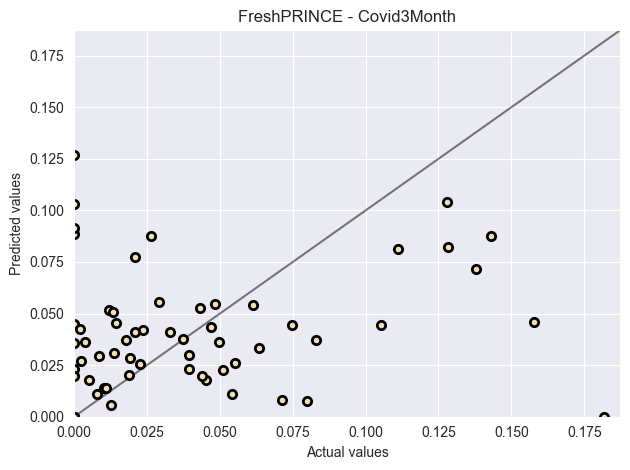

In [2]:
plot = plot_scatter_predictions(y_test, y_pred_fp, title="FreshPRINCE - Covid3Month")

plot.show()

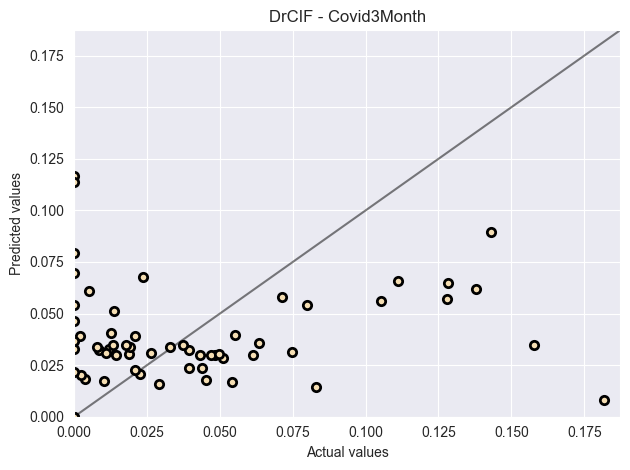

In [3]:
plot = plot_scatter_predictions(y_test, y_pred_drcif, title="DrCIF - Covid3Month")

plot.show()